In [128]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [130]:
import os
import json
import librosa
import numpy as np
import matplotlib.pyplot as plt
# from pesq import pesq
from scipy.io.wavfile import read
from scipy import signal
from sklearn.metrics import mean_squared_error

In [131]:
def combine_path(*paths) -> str:
    joined_path = os.path.join(*paths)
    return os.path.normpath(joined_path)

In [132]:
# Đọc metadata của tập dữ liệu
def load_metadata(metadata_path):
    """Load metadata từ file JSON."""
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)
    return metadata

In [133]:
# Tính SNR giữa tín hiệu và nhiễu
def compute_snr(signal, noise):
    """Tính Signal-to-Noise Ratio (SNR)."""
    signal_energy = np.sum(signal ** 2)
    noise_energy = np.sum(noise ** 2)
    snr = 10 * np.log10(signal_energy / noise_energy)
    return snr

In [134]:
# Kiểm tra độ dài của các file âm thanh (padding & overlap)
def check_audio_length(mixture_path):
    audio, sr = librosa.load(mixture_path, sr=None)
    return len(audio) / sr

In [135]:
# Vẽ biểu đồ phân phối Overlap Ratio và SNR
def plot_histogram(data, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [136]:
# Kiểm tra và đánh giá phân phối Overlap Ratio và SNR và độ dài
def evaluate_overlap_snr_length_distribution(metadata):
    overlap_ratios = [entry["overlap_ratio"] for entry in metadata]
    snr_values = [entry["snr_db"] for entry in metadata]
    lengths = [entry["duration"] for entry in metadata]

    plot_histogram(overlap_ratios, "Overlap Ratio Distribution", "Overlap Ratio (%)", "Frequency")
    plot_histogram(snr_values, "SNR Distribution", "SNR (dB)", "Frequency")
    plot_histogram(lengths, "Length Distribution", "Length (s)", "Frequency")


In [137]:
BASE_SOURCE_PATH = "../data/vivos/train/waves"
BASE_MIXED_PATH = ".."
METADATA_PATH = 'annotation_data.json'

In [ ]:
# Load metadata
metadata = load_metadata(METADATA_PATH)

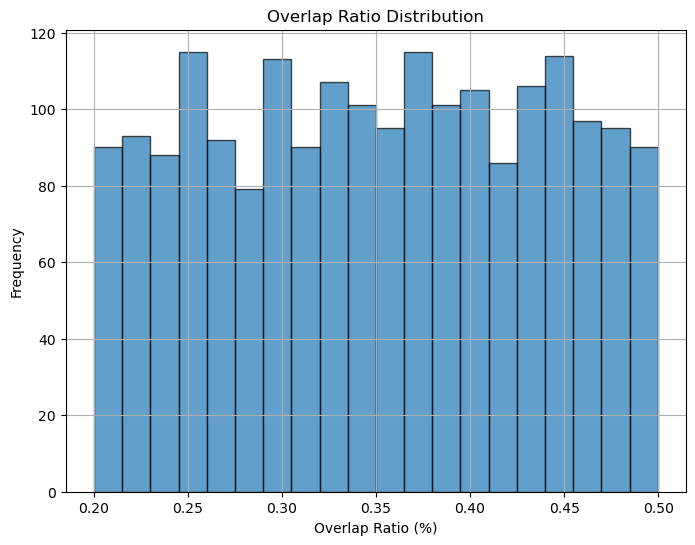

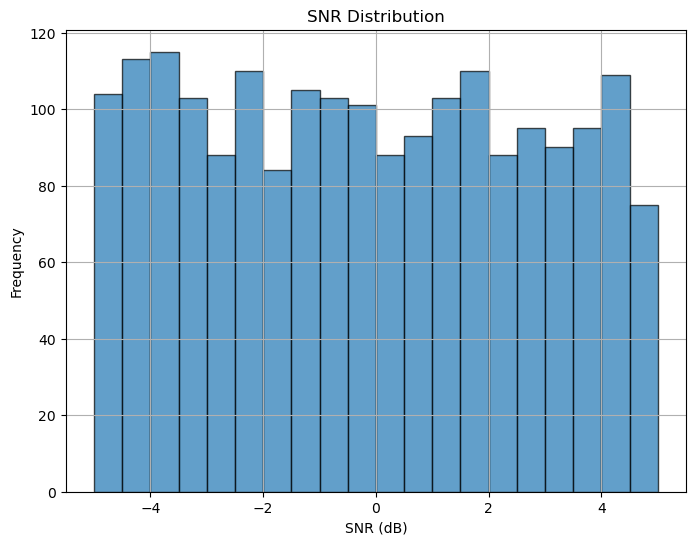

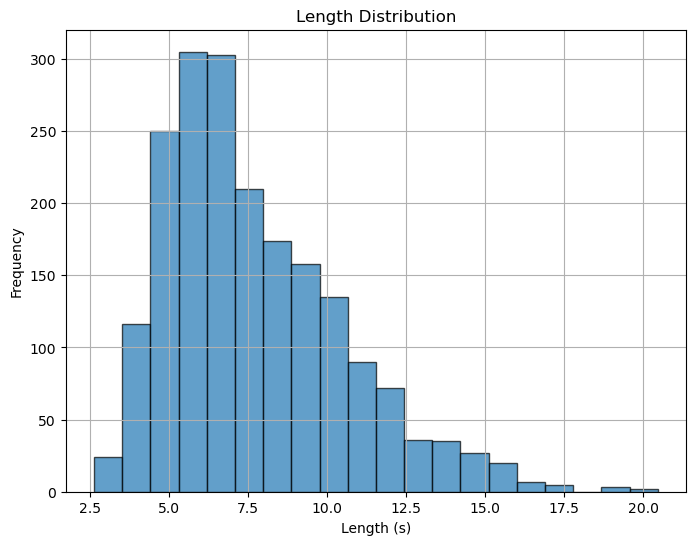

In [139]:
# Phân tích phân phối Overlap Ratio và SNR
evaluate_overlap_snr_length_distribution(metadata)

In [129]:
%pip install pesq

Note: you may need to restart the kernel to use updated packages.


In [177]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [178]:
from pesq import pesq
from scipy.io import wavfile
from tqdm import tqdm

In [ ]:
# Lắng nghe và đánh giá chất lượng âm thanh bằng PESQ và MOS
def compute_pesq(reference_path, degraded_path, sr=16000):
    """
    Đánh giá chất lượng âm thanh của file đã tách (degraded) so với file gốc (reference)
    bằng cách sử dụng PESQ (Perceptual Evaluation of Speech Quality).
    
    :param reference_path: Đường dẫn tới file âm thanh gốc (clean audio).
    :param degraded_path: Đường dẫn tới file âm thanh đã tách.
    :param sr: Tần số lấy mẫu của âm thanh (mặc định là 16kHz).
    :return: Điểm PESQ cho file âm thanh đã tách.
    """
    _, reference = wavfile.read(reference_path)
    _, degraded = wavfile.read(degraded_path)
    return pesq(sr, reference, degraded, mode = 'nb')

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1972/1972 [07:37<00:00,  4.31file/s]

Average PESQ Score: 1.41


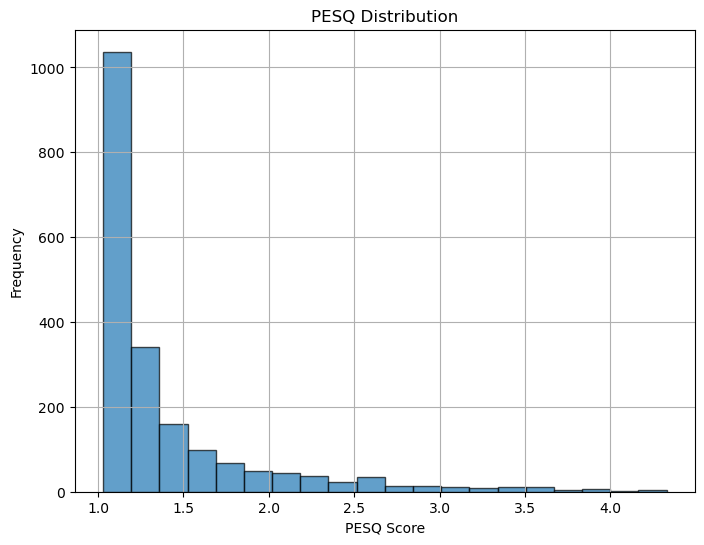

In [ ]:
"""Lắng nghe chất lượng âm thanh của một số mẫu và tính PESQ."""
pesq_scores2 = []
total_entries = len(metadata)
for entry in tqdm(metadata, desc="Processing", unit="file"):
    mixture_path = combine_path(BASE_MIXED_PATH, entry["mixture"])
    source1_path = combine_path(BASE_SOURCE_PATH, entry["source1"])
    source2_path = combine_path(BASE_SOURCE_PATH, entry["source2"])

    # Tính PESQ cho từng cặp file
    pesq_score = compute_pesq(source1_path, mixture_path, sr=entry["rate"])
    pesq_scores2.append(pesq_score)

#     pesq_score = compute_pesq(source2_path, mixture_path, sr=entry["rate"])
#     pesq_scores.append(pesq_score)
print(f"Average PESQ Score: {np.mean(pesq_scores2):.2f}")

plot_histogram(pesq_scores2, "PESQ Distribution", "PESQ Score", "Frequency")